In [12]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download(
    "undefinenull/million-song-dataset-spotify-lastfm"
)

print("Dataset downloaded to:", path)


Dataset downloaded to: /Users/prachyasumandas/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1


In [13]:
import os

for file in os.listdir(path):
    print(file)


User Listening History.csv
Music Info.csv
MP3-Example


In [14]:
import pandas as pd
import os

music_info_path = os.path.join(path, "Music Info.csv")
data = pd.read_csv(music_info_path)

print("First 5 rows of 'data' DataFrame (Music Info.csv):")
display(data.head())

First 5 rows of 'data' DataFrame (Music Info.csv):


,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [15]:
user_listening_path = os.path.join(path, "User Listening History.csv")
user = pd.read_csv(user_listening_path)

print("\nFirst 5 rows of 'user' DataFrame (User Listening History.csv):")
display(user.head())


First 5 rows of 'user' DataFrame (User Listening History.csv):


,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


Collaborative recommendetaion system

In [16]:
user['playcount'].describe()

count    9.711301e+06
mean     2.630946e+00
std      5.706324e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.948000e+03
Name: playcount, dtype: float64

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
user['counts']=user['playcount'].apply(lambda x : 1 if x==1 else  2 if x<=10 else 3 )

([<matplotlib.patches.Wedge at 0x3307e1050>,
 [Text(-0.36682265354215154, 1.0370347828536393, '1'),
  Text(0.25057408557655575, -1.0710801219504884, '<10'),
  Text(1.0933305637787885, -0.1209474195969334, '>10')],
 [Text(-0.20008508375026446, 0.565655336101985, '61%'),
  Text(0.13667677395084857, -0.5842255210639027, '36%'),
  Text(0.5963621256975209, -0.06597131978014549, '4%')])

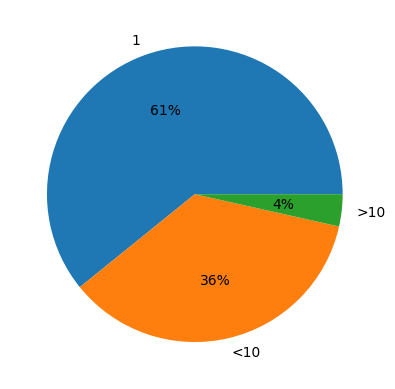

In [19]:
plt.pie(user['counts'].value_counts(),labels=['1','<10','>10'],autopct='%1.0f%%')

In [20]:
user.drop('counts',axis = 1,inplace = True)

In [21]:
user['log_counts'] = np.log1p(user['playcount'])

In [22]:
user

,track_id,user_id,playcount,log_counts
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,0.693147
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,0.693147
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,0.693147
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,0.693147
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1,0.693147
...,...,...,...,...
9711296,TRBKFKL128E078ED76,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1,0.693147
9711297,TRYFXPG128E078ECBD,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1,0.693147
9711298,TROBUUZ128F4263002,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1,0.693147
9711299,TROEWXC128F148C83E,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,1,0.693147


In [23]:
user['user_codes'] = user["user_id"].astype("category").cat.codes
user['track_codes'] = user["track_id"].astype("category").cat.codes


In [24]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   track_id     object 
 1   user_id      object 
 2   playcount    int64  
 3   log_counts   float64
 4   user_codes   int32  
 5   track_codes  int16  
dtypes: float64(1), int16(1), int32(1), int64(1), object(2)
memory usage: 351.9+ MB


In [25]:
user.duplicated().sum()

np.int64(0)

In [26]:
from scipy.sparse import csr_matrix

interaction_matrix = csr_matrix(
    (user["log_counts"], (user['user_codes'], user['track_codes']))
)


In [27]:
from implicit.als import AlternatingLeastSquares

model = AlternatingLeastSquares(
    factors=50,
    regularization=0.1,
    iterations=15
)

model.fit(interaction_matrix)


100%|██████████| 15/15 [00:41<00:00,  2.74s/it]


In [28]:
user_index = 7

recommendations = model.recommend(
    user_index,
    interaction_matrix[user_index],
    N=10
)


In [29]:
import numpy as np

item_indices, scores = recommendations


sorted_idx = np.argsort(scores)[::-1]

item_indices = item_indices[sorted_idx]
scores = scores[sorted_idx]

sorted_recommendations = (item_indices, scores)


In [30]:
for i in range(len(sorted_recommendations[0])):
    track_code = sorted_recommendations[0][i]
    score = sorted_recommendations[1][i]
    
    track_id = user[user['track_codes'] == track_code]['track_id'].iloc[0]
    track_name = data[data['track_id'] == track_id]['name'].iloc[0]
    artist_name = data[data['track_id'] == track_id]['artist'].iloc[0]
    
    print(f"Track: {track_name} by {artist_name.capitalize()}, Score: {score:.6f}")

Track: Fortunate Son by Creedence clearwater revival, Score: 0.048177
Track: Ride the Lightning by Metallica, Score: 0.034015
Track: Drunken Lullabies by Flogging molly, Score: 0.020695
Track: California Dreamin' by The mamas & the papas, Score: 0.018548
Track: Lookin' Out My Back Door by Creedence clearwater revival, Score: 0.018391
Track: The Unforgiven III by Metallica, Score: 0.016536
Track: It Was A Good Day by Ice cube, Score: 0.016437
Track: Word Up! by Korn, Score: 0.016074
Track: Welcome Home (Sanitarium) by Metallica, Score: 0.016067
Track: Don't Cry (original) by Guns n' roses, Score: 0.014789


Content based collaborative system

In [31]:
data['mode']

0        1
1        1
2        0
3        1
4        1
        ..
50678    0
50679    1
50680    0
50681    0
50682    1
Name: mode, Length: 50683, dtype: int64

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [33]:
df = data[['artist','tags','genre','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']]

In [34]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
Categorical columns: ['artist', 'tags', 'genre']


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[numeric_cols] = sc.fit_transform(df[numeric_cols])


/var/folders/rm/hth0y2ld5n7810rnyj1m4bm80000gn/T/ipykernel_44546/3612146464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = sc.fit_transform(df[numeric_cols])


In [36]:
df

,artist,tags,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,The Killers,"rock, alternative, indie, alternative_rock, in...",NaN,-0.774656,0.919413,-1.208715,0.864320,0.764615,-0.018718,-0.702067,-0.668405,-0.640651,-0.746334,0.830710,0.24269
1,Oasis,"rock, alternative, indie, pop, alternative_roc...",NaN,-0.472704,0.816159,-0.928450,0.861462,0.764615,-0.558145,-0.703331,-0.668405,-0.045615,0.841907,1.719004,0.24269
2,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",RnB,0.080874,0.554052,-0.367918,0.551457,-1.307848,-0.473942,-0.705418,-0.667044,-0.691004,0.424559,-0.118014,0.24269
3,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",NaN,-1.199626,-0.089301,1.033410,-0.123078,0.764615,-0.512096,-0.704712,-0.666462,-0.446276,0.219750,-0.639674,0.24269
4,Radiohead,"rock, alternative, indie, alternative_rock, in...",RnB,0.120016,-1.018589,0.472879,-0.361407,0.764615,-0.514728,-0.672316,-0.667987,-0.467933,-1.271883,-1.069068,0.24269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50678,アンティック-珈琲店-,NaN,NaN,-0.310545,0.978983,0.192613,1.149700,-1.307848,1.170651,-0.695694,-0.668405,-0.462519,-0.046889,1.466816,0.24269
50679,ACIDMAN,"rock, alternative_rock, japanese, cover",NaN,-0.797023,0.025867,-1.488981,0.325440,0.764615,0.578598,-0.702892,-0.668260,-0.126830,0.065176,2.594198,0.24269
50680,coldrain,"metal, metalcore, post_hardcore",NaN,-0.332912,1.145778,1.313676,1.143104,-1.307848,2.525796,-0.705639,-0.664222,-0.283846,-0.584032,1.165305,0.24269
50681,アンティック-珈琲店-,NaN,NaN,0.108833,0.855872,-0.367918,0.962378,-1.307848,-0.302904,-0.703635,-0.664400,-0.857224,0.714384,-0.458619,0.24269


In [37]:
(df['genre'].notnull().sum()/df.shape[0])*100

np.float64(44.09368032673678)

In [38]:
def three_words(tags):
    if isinstance(tags, str):
        tag_list = tags.split(',')
        return ','.join(tag_list[:3])
    return tags

In [39]:
df['tags'] = df['tags'].apply(three_words)

/var/folders/rm/hth0y2ld5n7810rnyj1m4bm80000gn/T/ipykernel_44546/2774004029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['tags'].apply(three_words)


In [40]:
df=df.fillna('nan')

In [41]:
df["text_features"] = df[categorical_cols].fillna("").agg(" ".join, axis=1)


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words="english"
)

tfidf_matrix = tfidf.fit_transform(df["text_features"])


In [43]:
from scipy.sparse import hstack, csr_matrix

content_matrix = hstack([
    tfidf_matrix,
    csr_matrix(df[numeric_cols].values)
])


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(content_matrix)


In [45]:
def recommend_songs(song_name, top_n=10):
    # Get index of the song
    if song_name not in data['name'].values:
        return f"Song '{song_name}' not found"
    
    idx = data[data['name'] == song_name].index[0]
    
    # Get similarity scores
    scores = list(enumerate(similarity_matrix[idx]))
    
    # Sort by similarity
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    
    # Get top-N (skip itself)
    top_songs = scores[1:top_n+1]
    
    # Fetch song details
    recommendations = []
    for i, score in top_songs:
        song = data.iloc[i]
        recommendations.append({
            'name': song['name'],
            'artist': song['artist'],
            'similarity': score
        })
    
    return recommendations

# Take user input


In [46]:
song_input = 'Wonderwall'
results = recommend_songs(song_input)

if isinstance(results, str):
    print(results)
else:
    for idx, rec in enumerate(results, 1):
        print(f"{idx}. {rec['name']} by {rec['artist']} - Similarity: {rec['similarity']:.4f}")

1. Everything's Magic by Angels & Airwaves - Similarity: 0.8983
2. Back Stabbin' Betty by Cage the Elephant - Similarity: 0.8925
3. Those Days You Felt Alive by Spitalfield - Similarity: 0.8924
4. Ready To Die by Andrew W.K. - Similarity: 0.8857
5. We Dreamt In Heist by Anberlin - Similarity: 0.8829
6. I Wanna Hold You by McFly - Similarity: 0.8826
7. If You Wanna by The Vaccines - Similarity: 0.8822
8. Rise & Shine by The Cardigans - Similarity: 0.8815
9. Bridge and Tunnel Authority by Less Than Jake - Similarity: 0.8811
10. Memory by Sugarcult - Similarity: 0.8802


Hybrid Recommendation System

In [48]:
song_name_to_index = {}

for idx, name in enumerate(data["name"]):
    song_name_to_index[name.lower()] = idx


In [49]:

track_code_to_id = dict(
    enumerate(user["track_id"].astype("category").cat.categories)
)


track_id_to_code = {v: k for k, v in track_code_to_id.items()}


In [ ]:
import numpy as np

def hybrid_recommend_songs(song_name, top_k=10, alpha=0.6):
    """
    song_name : str  -> input song
    top_k     : int  -> number of recommendations
    alpha     : float (0–1) -> weight for collaborative filtering
    """

    song_name = song_name.lower()

    # --------- 1. Check song exists ----------
    if song_name not in song_name_to_index:
        return "Song not found in dataset"

    # --------- 2. Get content index ----------
    song_idx = song_name_to_index[song_name]

    # --------- 3. Get track_id ----------
    track_id = data.iloc[song_idx]["track_id"]

    if track_id not in track_id_to_code:
        return "Song not present in collaborative model"

    track_code = track_id_to_code[track_id]

    # --------- 4. CONTENT-BASED SCORES ----------
    content_scores = similarity_matrix[song_idx]

    # normalize to 0–1
    content_scores = content_scores / content_scores.max()

    # --------- 5. COLLABORATIVE SCORES ----------
    collab_items, collab_scores = model.similar_items(
        track_code,
        N=len(track_code_to_id)
    )

    collab_scores = collab_scores / collab_scores.max()

    # map track_id → collab score
    collab_score_dict = {}
    for code, score in zip(collab_items, collab_scores):
        tid = track_code_to_id.get(code)
        if tid is not None:
            collab_score_dict[tid] = score

    # --------- 6. HYBRID SCORE FUSION ----------
    final_scores = []

    for idx in range(len(data)):
        tid = data.iloc[idx]["track_id"]

        c_score = content_scores[idx]
        cf_score = collab_score_dict.get(tid, 0)

        hybrid_score = alpha * cf_score + (1 - alpha) * c_score
        final_scores.append(hybrid_score)

    final_scores = np.array(final_scores)

    # --------- 7. RANK & REMOVE INPUT SONG ----------
    ranked_indices = np.argsort(final_scores)[::-1]
    ranked_indices = [i for i in ranked_indices if i != song_idx][:top_k]

    # --------- 8. PREPARE OUTPUT ----------
    recommendations = []
    for i in ranked_indices:
        recommendations.append({
            "song": data.iloc[i]["name"],
            "artist": data.iloc[i]["artist"],
            "score": final_scores[i]
        })

    return recommendations


In [54]:
# song_input = input("Enter a song name: ")
song_input = 'Wonderwall'
results = hybrid_recommend_songs(song_input)

if isinstance(results, str):
    print(results)
else:
    for i, rec in enumerate(results, 1):
        print(
            f"{i}. {rec['song']} by {rec['artist']} "
            f"- Hybrid Score: {rec['score']:.4f}"
        )


1. Poetically Pathetic by Amber Pacific - Hybrid Score: 0.9017
2. Those Days You Felt Alive by Spitalfield - Hybrid Score: 0.8917
3. I'm Taking You With Me by Relient K - Hybrid Score: 0.8853
4. Daddy's Little Defect by Sugarcult - Hybrid Score: 0.8814
5. Hum Hallelujah by Fall Out Boy - Hybrid Score: 0.8803
6. My Friends Over You by New Found Glory - Hybrid Score: 0.8783
7. Secret Crowds by Angels & Airwaves - Hybrid Score: 0.8691
8. G.I.N.A.S.F.S. by Fall Out Boy - Hybrid Score: 0.8683
9. Brink Of Disaster by MAE - Hybrid Score: 0.8656
10. The Quiet by We the Kings - Hybrid Score: 0.8612


Top 10 Recommended songs 